# This is Medical Image Data Generator - augmentation

In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [39]:
PATH = "data_v2/"
sz=256
arch = resnet34

In [40]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [41]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1, val_name='validation')
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [42]:
ims = np.stack([get_augs() for i in range(6)])

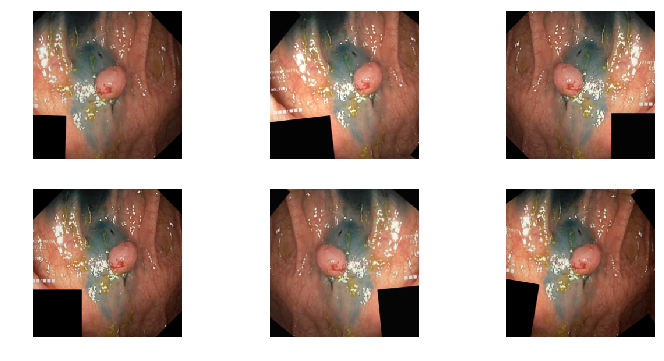

In [43]:
plots(ims, rows=2)

In [44]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1,tfm_y=True, sz_y=True, crop_type=CropType.CENTER)

In [45]:
ims = np.stack([get_augs() for i in range(6)])

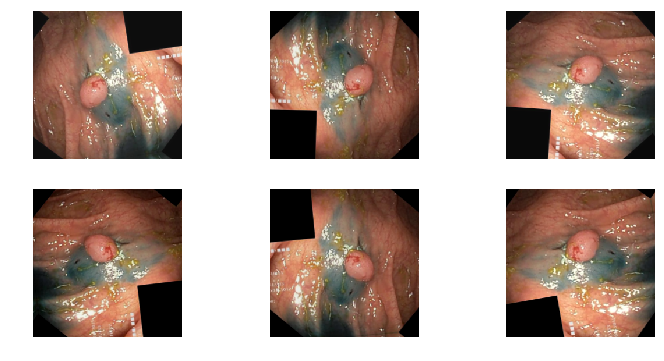

In [46]:
plots(ims, rows=2)